# Creating a Simple Interactive Map

## Simple Web Maps

Simple interactive web maps in Python are often made with a library called `folium`. These are not maps in the GIS sense because they can _only_ be viewed in a web browser, and sometimes even then only after disabling safety precautions in the browser itself (see notes at the end of this notebook). But in a Jupyter notebook context, `folium` works really well because it's just embedding more web content into a running web page. Simples!

As always, if you get stuck you may want to RTM: [Latest folium documentation](https://media.readthedocs.org/pdf/folium/latest/folium.pdf).

### Getting started

The mapping that we'll do this week is covered by just three libraries. But please make sure that you the latest version of folium installed (0.2.1 as of the time I'm writing this practical). If not, you'll have to go back to the video from Week 5 of Geocomp that shows you how to install libraries from the **Terminal**.

Here's a hint:
```shell
source activate spats
conda install folium
source deactivate spats
```

You would then make sure that you were running the right 'kernel' (here called 'spats' for Spatial Analysis) by picking 'Change Kernel' from the Kernel drop-down above.

#### Problems installing folium

The `conda` utility may _not_ find folium in the default 'channels' in which case it will output a very clear error message to that effect. If that happens, you'll have to work out how to install a package from a 'channel' by reading the output of each 'failed' step; it should take you three steps in all, but conda will help you with each one by providing a useful explanation of what needs doing next.

The output of the next block of code should be "0.2.1" (or a *higher* number such as 0.2.2 or 0.3).

In [160]:
import folium  
import pandas as pd
import os

print (folium.__version__)

%matplotlib inline

0.2.1


### Creating a map

Creating a map with Folium is dead simple, that's why we're starting this term with web maps and not more 'GIS-style' or 'data science-style' mapping.

Use the coding block below to create a map centered on 45<sup>o</sup> latitude and 0<sup>o</sup> longitude at zoom level 6. You may need to use `help(folium.Map)` to do this. You can do this with one line of code.

What country is shown?

In [161]:
folium.Map(location=(45,0), zoom_start=6)

### Creating a map with 'coordinate popup’

Let's reposition the map: the location of Birmingham is (roughly) 52.4381<sup>o</sup>N and 1.8936<sup>o</sup>W. Replace the `???` below so that the map you create will be centred on Birmingham. Notice that now we are using a _parameter_ for the location instead of hard-coding it. That will allow us to make a more _general_ example that could work for _any_ location, or to update and re-run the code quickly and easily.

Adding the 'coordinate popup' requires one more line of code, and notice that now we need to have a line that 'prints' the map (this the line with the simple `m`). This is because we now 'capture' the output of folium.Map so that we can add the popup functionality. In the example above, because we don't assign the output of `folium.Map` to a variable we didn't need to write `m` to 'print' it to the page.

*Hint: To learn more about what you can do with children try using `help(folium.Map.add_children)` or searching online via Google.*

In [162]:
MAP_COORDINATES = (52.4782, -1.8993) # ???

In [163]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=13) # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality
m # And now show the map

You should see a map centred on the city of Birmingham. **If you see a map centred somewhere off of the East coast of the UK (near Lowestoft) then you need to think about what 1.8936°W means in terms of x and y coordinates on a graph.**

Try clicking somewhere on the map, what happens?

### Changing the Tile 'Style'

Copy the folium code above into the coding cell below, and then change the map style to one of the other avilable types listed through the `help()` documentation or Google (e.g. the 'Stamen Toner' style). There are lots of examples [here](http://folium.readthedocs.io/en/latest/quickstart.html).

In [164]:
# ??? Remove all!
m = folium.Map(location=MAP_COORDINATES, zoom_start=13, tiles="Stamen Toner") # Create the map
m.add_children(folium.LatLngPopup()) # Add the popup functionality
m # And now show the map

## Customising Maps

We've seen how you can can manipulate the basic 'setup' of a map, now we're going to start adding features (i.e. 'stuff') to the map to customise it slightly.

### Adding a Marker

Drag the map that you created above until it is centred on Central London. Now click on the Strand Campus and make a note of the coordinates in the popup (they should be in the vicinity of 51.5<sup>o</sup> latitude and -0.1<sup>o</sup> longitude). We want to set this as the new map centre by creating a new variable containing those coordinates below:

In [165]:
MAP_COORDINATES = (51.5113, -0.1160) # ???

We want to add a marker showing where the Geography Department is on our map. Note that, because we use the same coordinates for centering the map _and_ for the popup, that means that the popup should be in the middle of map!

To do this, you will want to investigate how `folium.Marker` works.

In [166]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=18, tiles="Stamen Toner") # ???
m.add_children(folium.LatLngPopup())
# And now add a marker
folium.Marker(MAP_COORDINATES, # ???
              popup='Geography'
             ).add_to(m)
m # Print the map

### Adding More Markers

Now add the rest of the main King’s buildings on the North side of the Thames (Virginia Woolf, Bush House, Maughan Library and Somerset House East Wing) to this map using [a few different marker styles](http://fontawesome.io/icons/)! *Note:* not all of these icons worked when I tested this, but many do. The coordinates I have are:

| Location | Longitude | Latitude |
| -------- | --------- | ------ |
| Strand Campus   | -0.1160   | 51.5113  |
| Virginia Woolf | -0.1180   | 51.5147  |
| Maughan Library | -0.1104   | 51.5153  |
| Somerset House | -0.1172   | 51.5127  |
| Bush House  | -0.1166   | 51.5112  |

As a hint, you'll need to use the `icon` parameter in your code. To see how this works you might want to `Insert` -> `Cell Below` so that you can type `help(folium.Icon)` and view the output... or you can also look at some examples at [read the docs](http://folium.readthedocs.io/en/latest/quickstart.html).

I've created a simple data structure for you that has all of the location data you will need. Can you think how you might use a `for` loop and the dictionary-of-dictionaries data structure to make the process of adding the markers less tedious?

In [167]:
locs = {
    'Strand Campus':  {'lat': 51.5113, 'lon': -0.1160, 'icon': 'plane'},
    'Virginia Woolf': {'lat': 51.5147, 'lon': -0.1180, 'icon': 'shopping-cart'},
    'Maughan Library': {'lat': 51.5153, 'lon': -0.1104, 'icon': 'cog'},
    'Somerset House': {'lat': 51.5127, 'lon': -0.1172, 'icon': 'cloud'},
    'Bush House': {'lat': 51.5112, 'lon': -0.1166, 'icon': 'info-sign'}
}

m = folium.Map(location=MAP_COORDINATES, zoom_start=15, tiles="Stamen Toner")

for l, v in locs.iteritems(): # ???
    # And now add a marker
    folium.Marker( (v['lat'], v['lon']), icon=folium.Icon(color='green', icon=v['icon']), 
              popup=l
             ).add_to(m)
m # Print the map

## Using Data with Folium

OK, so that was fairly straightforward: 
1. Pick a lat/long location for the centre of the map.
2. Pick a zoom level
3. Add some popup info
4. Show map

### Creating a Choropleth Map

For polygon data we can create what is called a _choropleth_ map: that's the technical term for a map that uses colour to represent data values. Perhaps you'd like to take a look at the help for this method or search Google for `Folium choropleth`)? 

If you search online you will need to make sure that you are looking at the documentation for how to show a choropleth for version 0.2 or higher since version 0.1 used a very different approach...

In [168]:
help(folium.Map.choropleth)

Help on method choropleth in module folium.folium:

choropleth(self, geo_path=None, geo_str=None, data_out='data.json', data=None, columns=None, key_on=None, threshold_scale=None, fill_color='blue', fill_opacity=0.6, line_color='black', line_weight=1, line_opacity=1, legend_name='', topojson=None, reset=False) unbound folium.folium.Map method
    Apply a GeoJSON overlay to the map.
    
    Plot a GeoJSON overlay on the base map. There is no requirement
    to bind data (passing just a GeoJSON plots a single-color overlay),
    but there is a data binding option to map your columnar data to
    different feature objects with a color scale.
    
    If data is passed as a Pandas dataframe, the "columns" and "key-on"
    keywords must be included, the first to indicate which DataFrame
    columns to use, the second to indicate the layer in the GeoJSON
    on which to key the data. The 'columns' keyword does not need to be
    passed for a Pandas series.
    
    Colors are generated from

### Using GeoJSON files

To create our choropleth we'll actually be overlaying data rather than just adding some markers. Folium can't read Shapefiles, but it _can_ read simple GeoJSON and show it on a map for you. If the GeoJSON file contains polygons, then we can turn our output into a basic _choropleth_ map.

#### Using JSON data

In theory, Folium actually has two ways to pull in the GeoJSON data that we want: 1) directly from the URL (using `geo_path`); 2) as a 'resource' (using `geo_str`) in which case you need to give Folium the raw data and not just a location. 

Unfortunately, in practice method \#1 doesn't work quite the way I think it should (I've even submitted a bug to that effect) so we are going to use the second approach: although it's a little bit harder (_one_ extra line of code!) it gives us more flexibility later because we can also examine the JSON data directly rather than just wondering why our map isn't working. 

For the record, the second approach is the same as what we used in Term 1 with the MetOffice API. The key thing to remember is that your request to the JSON URL will have received a _response_ (saved in `r`) but that you need to tell the `response` object to treat the raw response as JSON data using a _method_. The way to do this will be the same as that time! 

#### Finding JSON data

You can find JSON data all over the place, although GeoJSON is a little more rare. One good example that I could find is the GeoJSON world map available from https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson into your map! To find out more about this file have a look at: http://data.okfn.org/data/datasets/geo-boundaries-world-110m.

Let's start be downloading the GeoJSON file I've just suggested...

In [169]:
import requests
jsonURL = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson' # ???
r = requests.get(jsonURL) # ???
print("Done")

Done


To create a map, you will need to tell Folium about the polygon data and you will also need to: 
1. Set the fill colour to none.
2. Set the outline colour to red.

I've filled in reasonable defaults for the rest of the parameters but feel free to play with them to see what effect this has!

In [170]:
r = requests.get(jsonURL)
m = folium.Map(location=MAP_COORDINATES, zoom_start=5)
m.choropleth (
    geo_str=r.json(), # ??? # This needs to be the JSON response to your request...
    fill_color=None, line_color='red', fill_opacity=0.0, line_opacity=0.25, line_weight=2) # ???
m # And show the map

You should see an outline of the world with simplified borders -- this is a common 'problem' in geodata: if they were to provide us with high-resolution data then the JSON file would be much, much larger (Gigabytes, instead of Kilobytes). Remember this downsampling 'trick' when working with geodata!

### Exploring the JSON file

What _properties_ are available for each country in the GeoJSON file? There's a clue to how to find the answer in the question... I'll give you some starter code to help you skip over the most tedious stuff...

In [171]:
def get_country_by_index(json, cntry=0):
    return json['features'][cntry]
    
print(get_country_by_index(r.json()))

{u'geometry': {u'type': u'Polygon', u'coordinates': [[[61.210817091725744, 35.650072333309225], [62.230651483005886, 35.270663967422294], [62.98466230657661, 35.40404083916762], [63.19353844590035, 35.857165635718914], [63.98289594915871, 36.0079574651466], [64.5464791197339, 36.31207326918427], [64.7461051776774, 37.111817735333304], [65.58894778835784, 37.30521678318564], [65.74563073106683, 37.66116404881207], [66.21738488145934, 37.39379018813392], [66.51860680528867, 37.36278432875879], [67.07578209825962, 37.35614390720929], [67.82999962755952, 37.144994004864685], [68.13556237170138, 37.02311513930431], [68.85944583524594, 37.344335842430596], [69.19627282092438, 37.15114350030743], [69.51878543485796, 37.60899669041342], [70.11657840361033, 37.58822276463209], [70.27057417184014, 37.735164699854025], [70.3763041523093, 38.13839590102752], [70.80682050973289, 38.486281643216415], [71.34813113799026, 38.25890534113216], [71.23940392444817, 37.953265082341886], [71.54191775908478,

Notice the long section of floating-point numbers? Why are they provided in pairs? What do you think they represent and what evidence to do you have for thinking this?

And now, using what you've understood from the previous code:
2. What country has index 20? 
3. How would you change the code to print only that country's abbreviated name?
4. How about it's ISO-3 abbreviation?

In [172]:
print("Abbreviated Name: " + get_country_by_index(r.json(), 20)['properties']['abbrev'])
print("ISO-3 Name: " + get_country_by_index(r.json(), 20)['properties']['iso_a3'])

Abbreviated Name: Belize
ISO-3 Name: BLZ


### Joining Data to GeoJSON

So now we've been able to add a world map on top of Folium, but that's not _hugely_ useful unless we can also link it to some data... 

Helpfully, the World Bank publishes a lot of data about countries here: http://data.worldbank.org/indicator/SP.POP.TOTL. Click on the 'Download' link and save the CSV file to the _data_ directory for the Spatial Analysis module (it will be a directory called 'data' one level _lower_ than _this_ Notebook).

Here's a really useful trick for reading a CSV file out of a Zip archive that contains multiple files! We will start by just opening the Zip file and printing out what files are inside.

In [173]:
# Import library to read Zip files
import zipfile 
import os

# Load the Zip file
z = zipfile.ZipFile(os.path.join('data','API_SP.POP.TOTL_DS2_en_csv_v2.zip'))

# Show what files are contained inside
print(z.namelist())

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2.csv']


Make sure you understand what's happening above. Add comments!

When you want to read the CSV file from the Zip archive then you use `z.open(<filename>)`. So, you will need to pass `z.open...` to pandas' `read_csv` command and _then_ specify _both_ `skiprows` and `header` in order to parse the file properly -- while you try to work out what to do you might wants to unzip a copy of this file so that you can view the file directly (but you can then delete it once you've made sense of the headers so that it takes up less space).

Although this process might seem a little convoluted compared to just unzipping the file and reading the CSV file directly into pandas, let's take note of what this allows us to do: we no longer need to extract files from archives in order to read them; we can save a lot of disk space (since tabular data tends to compress well); and we can now do this for _any_ Zip archive, including those that contain multiple files inside!

In [174]:
# Read in the CSV file extracted from the 
# Zip archive in the previous code block
import pandas as pd
df = pd.read_csv(z.open('API_SP.POP.TOTL_DS2_en_csv_v2.csv'), skiprows=[0], header=1)

# Drop unneeded columns from the data frame
df.drop(['Unnamed: 61','2016','Indicator Code','Indicator Name'], inplace=True, axis=1)

# Change the names of the first two columns so that 
# they don't have spaces in them any more...
new_cols = df.columns.values.tolist()
new_cols[0] = 'Name'
new_cols[1] = 'Code'
df.columns = new_cols

# Check it worked
df.head(3)

Name Code      1960      1961      1962      1963      1964  \
0        Aruba  ABW    54,208    55,435    56,226    56,697    57,029   
1      Andorra  AND    13,414    14,376    15,376    16,410    17,470   
2  Afghanistan  AFG 8,994,793 9,164,945 9,343,772 9,531,555 9,728,645   

       1965       1966       1967    ...           2006       2007       2008  \
0    57,360     57,712     58,049    ...        100,830    101,218    101,342   
1    18,551     19,646     20,755    ...         83,373     84,878     85,616   
2 9,935,358 10,148,841 10,368,600    ...     25,183,615 25,877,544 26,528,741   

        2009       2010       2011       2012       2013       2014       2015  
0    101,416    101,597    101,936    102,393    102,921    103,441    103,889  
1     85,474     84,419     82,326     79,316     75,902     72,786     70,473  
2 27,207,291 27,962,207 28,809,167 29,726,803 30,682,500 31,627,506 32,526,562  

[3 rows x 58 columns]

In [175]:
# This sets a useful number format for all summaries
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x))
df=df.dropna()
# Summarise
df.describe()

1960          1961          1962          1963          1964  \
count           258           258           258           258           258   
mean    119,320,358   120,918,422   123,051,629   125,698,919   128,372,813   
std     374,248,096   378,714,965   385,277,313   393,811,414   402,406,179   
min           4,279         4,453         4,566         4,656         4,748   
25%         530,956       543,656       556,915       567,715       578,862   
50%       3,722,920     3,820,726     3,922,179     4,008,564     4,118,156   
75%      25,957,861    26,814,882    27,689,183    28,578,014    29,468,196   
max   3,035,055,570 3,076,120,548 3,129,063,789 3,193,947,306 3,259,354,557   

               1965          1966          1967          1968          1969  \
count           258           258           258           258           258   
mean    131,108,554   133,988,992   136,862,360   139,788,333   142,859,232   
std     411,224,511   420,608,092   429,939,487   439,481,573   449,511,868   
min           4,841         4,936         5,033         5,161         5,303   
25%         584,664       592,221       601,297       611,551       622,414   
50%       4,245,436     4,335,241     4,392,266     4,427,290     4,501,532   
75%      30,330,905    31,104,578    31,523,112    31,930,567    32,297,292   
max   3,326,054,230 3,395,866,317 3,465,297,420 3,535,511,844 3,609,910,116   

           ...               2006          2007          2008          2009  \
count      ...                258           258           258           258   
mean       ...        269,025,357   272,503,383   276,036,015   279,599,529   
std        ...        847,163,893   857,500,063   867,960,321   878,527,841   
min        ...              9,732         9,764         9,788         9,808   
25%        ...          1,314,058     1,317,115     1,350,058     1,377,743   
50%        ...          9,155,773     9,294,787     9,373,818     9,565,088   
75%        ...         56,034,020    56,503,436    56,877,550    57,163,955   
max        ...      6,594,722,462 6,675,832,678 6,758,302,523 6,840,955,706   

               2010          2011          2012          2013          2014  \
count           258           258           258           258           258   
mean    283,184,713   286,809,445   290,427,868   294,192,885   297,912,516   
std     889,167,131   899,928,160   910,749,636   921,837,632   932,909,726   
min           9,827         9,844         9,860         9,876         9,893   
25%       1,384,090     1,395,417     1,409,556     1,424,658     1,443,366   
50%       9,739,848     9,889,198    10,087,182    10,301,820    10,461,756   
75%      57,391,316    57,565,940    57,790,748    58,473,515    59,106,517   
max   6,923,684,085 7,006,907,989 7,089,451,551 7,176,092,192 7,260,780,278   

               2015  
count           258  
mean    301,678,455  
std     944,052,644  
min           9,916  
25%       1,464,251  
50%      10,539,805  
75%      59,340,794  
max   7,346,633,037  

[8 rows x 56 columns]

### Binning the Data

I can tell simply from looking at the summary above that we're dealing with a pretty massively skewed data set... how can I tell that? What are the clues?

Let's check that by making a plot of the data from 1960:

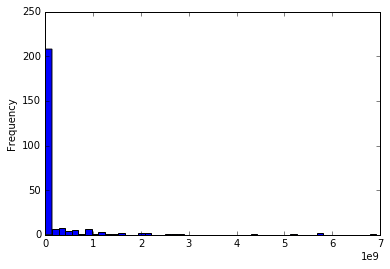

In [176]:
df['2010'].plot.hist(bins=50)

### Cleaning

In fact, some of thsose counts are clearly impossible if _all_ this data file contains is country populations. Let's look a little more closely at the data... We know that the largest value in the data set is 6.92 _billion_. That seems a tad large for any one country and looks suspiciously like the world population. 

So how could we see if there's anything unusual included in the data beyond just country data? Let's think in terms of what we want from the data: the largest _legitimate_ value in the data should be the population of China, so let's start there by extracting the value of China's population in 2010 from the dataframe `df`.

In [177]:
c_pop = df.loc[df.Name=='China','2010'].values[0]
print("China's population in 2010 was: " + str(c_pop))

China's population in 2010 was: 1337705000.0


Now we can use this value to find out what rows have populations that are greater than or equal to what we _expected_ to be the maximum:

In [178]:
df[df['2010'] >= c_pop][['Name','Code','2010']]

Name Code          2010
38                                         China  CHN 1,337,705,000
58   East Asia & Pacific (excluding high income)  EAP 1,963,842,316
59                    Early-demographic dividend  EAR 2,904,408,228
60                           East Asia & Pacific  EAS 2,204,613,382
99                                     IBRD only  IBD 4,305,816,336
100                             IDA & IBRD total  IBT 5,793,949,021
101                                    IDA total  IDA 1,488,132,685
137                          Lower middle income  LMC 2,719,003,012
138                          Low & middle income  LMY 5,769,206,886
140                    Late-demographic dividend  LTE 2,182,060,690
154                                Middle income  MIC 5,212,280,503
201                                   South Asia  SAS 1,628,688,562
227   East Asia & Pacific (IDA & IBRD countries)  TEA 1,939,296,199
237                      South Asia (IDA & IBRD)  TSA 1,628,688,562
246                          Upper middle income  UMC 2,493,277,491
257                                        World  WLD 6,923,684,085

_Interesting..._ So it looks like the World Bank has also created some aggregate values for us. If we were going to do some serious analysis then we wouldn't really want to keep these, and we'd also have to check if there were other aggregates that whose values _less_ than the population of China. For instance, perhaps there's a 'North America' row, or a 'Middle East' row? We'll not worry about the latter problem in this exercise, but let's get rid of the huge numbers that are pulling our distribution out of whack.

For this we need to combine several steps in a complex way, but you can make sense of it by working from the inside out:

1. `df['2010'] > c_pop]` selects the rows where the 2010 population is greater than China's population in 2010.
2. `df.index[ <step 1> ]` tells pandas to use this boolean result set (the long True/False series) on the index, so it will only select those rows where this is `True`.
3. `dr.drop( <step 2>, inplace=True)` then tells pandas to drop the rows selected by applying `True` values to the index.

In [179]:
df.drop( df.index[df['2010'] > c_pop], inplace=True )
df[df['2010'] >= c_pop][['Name','Code','2010']]

Name Code          2010
38  China  CHN 1,337,705,000

Even after doing this, the data is still going to be skewed and it _might_ be useful to work with quantiles or rank. Why is that? What do those two approaches allow us to do when making a map?

### Rank

Let's start with rank. We want the population rank in 2010 as our legend for the map so let's calculate that first. This is so straightforward that I'm not going to help you: you can just search online for help to do with series rank and the only 'trick' is to remember that we probably want China to have rank 1 (because it's biggest) and Tuvalu to have rank 248 (because it's smallest).

In [180]:
df['r2010'] = df['2010'].rank(ascending=False) # ???
df[ (df.r2010==1) | (df.r2010==df.r2010.max()) ][['Name','2010','r2010']]

Name          2010  r2010
38    China 1,337,705,000      1
242  Tuvalu         9,827    243

### Quantiles

Do you remember how to get a list of quantiles from a pandas data frame? No? Well you’ll have to go look at your old Geocomputation code (or use `help(<data frame>.<column name>.quantile)`)! Let’s get the following quantiles: 0th, 20th, 40th, 60th, 80th, and 100th for 2010.

*Hint*: you should get the following numbers...
* 9,827
* 521,355
* 4,525,213
* 13,148,921
* 56,259,655
* 1,337,705,000

Let's calculate these first and then figure out how to create a quantiles column:

In [181]:
quantiles = df['2010'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
for q in quantiles:
    print("Quantile: " + '{:,.0f}'.format(q))

Quantile: 9,827
Quantile: 521,355
Quantile: 4,557,179
Quantile: 14,051,835
Quantile: 61,370,786
Quantile: 1,337,705,000


In [182]:
df['q2010'] = pd.cut(df['2010'], bins=quantiles, labels=['Quantile ' + str(x) for x in range(1, len(quantiles))])

What do you think that just did? Maybe Google search for the answer or output just some key fields?

In [183]:
df[['Name','Code','2010','r2010','q2010']].sample(5)

Name Code       2010  r2010       q2010
153      Marshall Islands  MHL     52,428    231  Quantile 1
6    United Arab Emirates  ARE  8,329,453    122  Quantile 3
185           Philippines  PHL 93,038,902     39  Quantile 5
4                 Albania  ALB  2,913,021    164  Quantile 2
175                Norway  NOR  4,889,252    145  Quantile 3

## Prepping the Data

Unlike the tool we'll see next week, Folium requires that there be no rows in _one_ data set that have **no match** in the _other_ data set. So if we want to join World Bank population data to the GeoJSON world map data then we need to have the same number of rows in both data sets _and_ we need to have a match on every single row in the _join column_ (much more on this in the next two weeks). In plainer English: if we want to create our map then every country code in the GeoJSON data set must have a matching country code in the pandas data frame.

In [184]:
# We need to find all of the keys that are
# 'in' the GeoJSON file but are 'missing'
# from the pandas data frame. The best way
# to do this is to extract a list from the 
# JSON file and then compare it the codes.
def get_country_code(f):
    return f['properties']['iso_a3']

my_json_codes = [] # Get the country codes from the JSON file
for c in r.json()['features']:
    my_json_codes.append(get_country_code(c))
    
my_df_codes = df.Code.values.tolist() # Get the country codes from the data frame

In [185]:
# You can use this block to see what 
# these new lists contain...
print(my_json_codes)

print(" ")

print(my_df_codes)

[u'AFG', u'AGO', u'ALB', u'ARE', u'ARG', u'ARM', u'ATA', u'ATF', u'AUS', u'AUT', u'AZE', u'BDI', u'BEL', u'BEN', u'BFA', u'BGD', u'BGR', u'BHS', u'BIH', u'BLR', u'BLZ', u'BOL', u'BRA', u'BRN', u'BTN', u'BWA', u'CAF', u'CAN', u'CHE', u'CHL', u'CHN', u'CIV', u'CMR', u'COD', u'COG', u'COL', u'CRI', u'CUB', u'-99', u'CYP', u'CZE', u'DEU', u'DJI', u'DNK', u'DOM', u'DZA', u'ECU', u'EGY', u'ERI', u'ESP', u'EST', u'ETH', u'FIN', u'FJI', u'FLK', u'FRA', u'GAB', u'GBR', u'GEO', u'GHA', u'GIN', u'GMB', u'GNB', u'GNQ', u'GRC', u'GRL', u'GTM', u'GUY', u'HND', u'HRV', u'HTI', u'HUN', u'IDN', u'IND', u'IRL', u'IRN', u'IRQ', u'ISL', u'ISR', u'ITA', u'JAM', u'JOR', u'JPN', u'KAZ', u'KEN', u'KGZ', u'KHM', u'KOR', u'-99', u'KWT', u'LAO', u'LBN', u'LBR', u'LBY', u'LKA', u'LSO', u'LTU', u'LUX', u'LVA', u'MAR', u'MDA', u'MDG', u'MEX', u'MKD', u'MLI', u'MMR', u'MNE', u'MNG', u'MOZ', u'MRT', u'MWI', u'MYS', u'NAM', u'NCL', u'NER', u'NGA', u'NIC', u'NLD', u'NOR', u'NPL', u'NZL', u'OMN', u'PAK', u'PAN', u'PER',

Here we're going to make use of a new type of Python class: the set. A set is like an _unordered_ list, which might seem less than useful but it has very specific benefits for what we are doing: we can ask Python to quickly tell us whether something is _in_ the set or not without needing to write a `for` loop and step through the list one item at a time. So using two sets we can quickly find out their _intersection_ or their _dijoint_ (what's in one set, but not the other).

In [186]:
# Convert the lists to sets...
js = set(my_json_codes)
ds = set(my_df_codes)

#### Rows Missing from World Bank Data

To find out what's in the JSON data but missing from the World Bank data we use the 'difference' operation and then add these rows to the `df`...

In [187]:
help(js.difference)

Help on built-in function difference:

difference(...)
    Return the difference of two or more sets as a new set.
    
    (i.e. all elements that are in this set but not the others.)



In [188]:
# And find out what's in the JSON
# file that is *not* in the data frame
missing = js.difference(ds)
print("Missing rows from data frame: " + ", ".join(missing))
print(type(missing))

Missing rows from data frame: -99, ATF, ATA, TWN, PSE, SRB, FLK, KWT, ERI, ESH
<type 'set'>


In [189]:
# Create a simple data frame from the missing country codes
d = {'Name': list(missing), 'Code': list(missing)}
dfm = pd.DataFrame.from_dict(d)
dfm # dfm = data frame missing

Code Name
0  -99  -99
1  ATF  ATF
2  ATA  ATA
3  TWN  TWN
4  PSE  PSE
5  SRB  SRB
6  FLK  FLK
7  KWT  KWT
8  ERI  ERI
9  ESH  ESH

#### Append Missing Data Frame Records

Now we can just append the missing values to the data frame and the years will be filled in with NaNs.

In [201]:
dfn = df.append(dfm, ignore_index=True) # dfn = data frame new
dfn['2000'].fillna(0, inplace=True)
dfn['2010'].fillna(0, inplace=True)
dfn.tail(8)[['Name','Code','2000','2010']]

Name Code  2000  2010
245  ATA  ATA     0     0
246  TWN  TWN     0     0
247  PSE  PSE     0     0
248  SRB  SRB     0     0
249  FLK  FLK     0     0
250  KWT  KWT     0     0
251  ERI  ERI     0     0
252  ESH  ESH     0     0

#### Removing 'Extra' Rows from World Bank Data

We now need to do the 'reverse' operation: finding and removing the data that is in the World Bank data set but which has _no match_ in the GeoJSON file. So this is just the same `difference` operation, but with the positions reversed:

In [202]:
extraneous = ds.difference(js)
print(sorted(list(extraneous)))

['ABW', 'AND', 'ARB', 'ASM', 'ATG', 'BHR', 'BMU', 'BRB', 'CEB', 'CHI', 'COM', 'CPV', 'CSS', 'CUW', 'CYM', 'DMA', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'FRO', 'FSM', 'GIB', 'GRD', 'GUM', 'HIC', 'HKG', 'HPC', 'IDB', 'IDX', 'IMN', 'KIR', 'KNA', 'KSV', 'LAC', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'MAC', 'MAF', 'MCO', 'MDV', 'MEA', 'MHL', 'MLT', 'MNA', 'MNP', 'MUS', 'NAC', 'NRU', 'OED', 'OSS', 'PLW', 'PRE', 'PSS', 'PST', 'PYF', 'SGP', 'SMR', 'SSA', 'SSF', 'SST', 'STP', 'SYC', 'TCA', 'TEC', 'TLA', 'TMN', 'TON', 'TSS', 'TUV', 'VCT', 'VGB', 'VIR', 'WSM']


In [203]:
# And delete using the index labels as we did 
# above when we removed the values larger than
# China...
dft = dfn.drop(dfn.index[dfn.Code.isin(extraneous)])
# dft= dft.dropna()
# And check it worked by looking for the 'World' data set
# dft = data frame tidy
dft[dft.Code.isin(['ATF','CYM','OSS','TWN','WLD','CAN'])][['Code','Name','2010']]

Code    Name       2010
33   CAN  Canada 34,005,274
244  ATF     ATF          0
246  TWN     TWN          0

In [204]:
len(dft[dft['2010'] <= 2931457])

44

In [205]:
# Rebuild the quantiles using tidied data frame (dft)
quantiles = dft['2010'].quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
dft['q2010'] = pd.cut(dft['2010'], bins=quantiles, labels=[x for x in range(1, len(quantiles))])

# For debugging purposes
for q in range(1, len(quantiles)):
    print("Quantile {} has threshold ".format(q) + '{:,.0f}'.format(quantiles[q]) + " containing " + str(len(dft[dft['q2010'] == q])) + " rows")

# Rebuild the rank using the tidied data frame
dft['r2010'] = dft['2010'].rank(ascending=False)

dft.sample(7)[['Code','Name','q2000','r2010']]

Quantile 1 has threshold 1,961,571 containing 25 rows
Quantile 2 has threshold 5,933,344 containing 35 rows
Quantile 3 has threshold 13,341,050 containing 35 rows
Quantile 4 has threshold 34,411,451 containing 35 rows
Quantile 5 has threshold 1,337,705,000 containing 35 rows


Code           Name q2010  r2010
76   GHA          Ghana     4     49
64   EST        Estonia     1    145
167  OMN           Oman     2    131
130  LUX     Luxembourg     1    158
156  NAM        Namibia     2    135
26   BOL        Bolivia     3     84
157  NCL  New Caledonia     1    163

In [206]:
# print dft['Code' == 'ATA']
# print r.json()

### Finally!!!

OK, we can now finally make our map by adding a few new parameters to our choropleth mapping command:

1. `data=<data frame>` tells Folium to use data from the `dft` data frame (Folium 'speaks' pandas)
2. `columns=[<column1>, <column2>]` tells Folium which columns to use from the data frame.
3. `key_on` tells Folium how to join `column1` selected from the data frame with the GeoJSON data using a syntax of `<feature>.<properties>.<key>`.

Since this is fairly tricky, I'm giving you code that _should_ work if everything up to this point has gone smoothly.

In [207]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=3)
m.choropleth (
    geo_str=r.json(),
    data=dft,
    columns=['Code','q2010'],
    key_on='feature.properties.iso_a3',
    threshold_scale=range(1, len(quantiles)),
    legend_name='2010 Population Quantiles',
    fill_color='YlGn', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

In [208]:
m = folium.Map(location=MAP_COORDINATES, zoom_start=2)
m.choropleth (
    geo_str=r.json(),
    data=dft,
    columns=['Code','r2010'],
    key_on='feature.properties.iso_a3',
    threshold_scale=range(int(dft.r2010.min()), int(dft.r2010.max()), 30),
    legend_name='2010 Population Rank',
    fill_color='PuBu', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

Take a minute to think about the results:
2. How could we get a scale that _doesn't_ emphasise the countries with small populations?
3. Is quantile or rank the best way to represent the population anyway?

## Testing Your Understanding

Let’s see how well you've understood everything so far... I want you to create a choropleth map using a [GeoJSON file of US states](http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_20m.json) and the population data available from [the Census](https://www2.census.gov/programs-surveys/popest/tables/2010-2016/state/totals/nst-est2016-01.xlsx)

Do this by pulling together _all_ of the code that you used above into one long code block below that you can run _separately_ from all of the other code on this page. Even the import statements at the top! Once you've got the code to run successfully once, the easiest way to check that you've got it all 'right' is to click on the `Kernel` drop-down and then select `Restart`: that will clear all of the existing variables and data so that when you run the code you've written below it won't be able to accidentally drawn upon any work you've already done. The result would then be the same as if you ran it as a standalone Python script.

The structure for this code block should be something along the lines of:
1. Import libraries
2. Specify GeoJSON and Census URLs
3. Download GeoJSON via a request object
4. Download Census data via a pandas object.
5. Do any cleaning required to match the state names (_hint_: there is a potential problem with the pandas column containing the state names -- which is probably your index -- and you will need to look up "pandas lstrip" in Google).
5. Check the overlap between the State names in the GeoJSON data and the Geographic Area values in the pandas data frame.
6. Remove any _unduplicated_ values.
7. Map it!

In [209]:
import folium 
import requests
import pandas as pd

%matplotlib inline

json_url = 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_20m.json'
data_url = 'https://www2.census.gov/programs-surveys/popest/tables/2010-2016/state/totals/nst-est2016-01.xlsx'

# We get the GeoJSON this way so that we only have to request it _once_
r = requests.get(json_url)

# Check the result
print("Arizona data: " + str(r.json()['features'][0]['properties']))

# Get the state data
df = pd.read_excel(data_url, skiprows=[0,1,2], skip_footer=7, header=0)

# Change the name of column 1 to something more tractable
new_cols    = df.columns.values
new_cols[0] = 'Name'
df.columns  = [ str(c) for c in new_cols ]

# Check the result
df.head(7)

# Fix the problem with the state names in the data frame
df.Name = df.Name.str.lstrip(to_strip=".")

# Find the set of state names in both data sets
def get_state(f):
    return f['properties']['NAME']

my_json_codes = [] 
for c in r.json()['features']:
    my_json_codes.append(get_state(c))
js = set(my_json_codes)
    
ds = set(df.Name.values.tolist())

# And now add/remove missing values as needed
print("Missing from Census file: " + str(js.difference(ds)))
print("Missing from JSON file: " + str(ds.difference(js)))

# Create a simple data frame from the missing country codes
missing = js.difference(ds)
d = {'Name': list(missing)}
dfm = pd.DataFrame.from_dict(d)
dfm # dfm = data frame missing

# Append Puerto Rico to the data frame since
# Folium won't work without it
dfn = df.append(dfm, ignore_index=True)
dfn.tail(8)

# Remove rows from data frame without JSON match
extraneous = ds.difference(js)
dft = dfn.drop(dfn.index[dfn.Name.isin(extraneous)])
dft.head()

# Create the choropleth categories
# Here I'm using JinPing's method of dropna() within quantiles'calculation
quantiles = dft['2015'].dropna().quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]).values.tolist() # ???
dft['q2015'] = pd.cut(dft['2015'], bins=quantiles, labels=[x for x in range(1, len(quantiles))])

# For debugging purposes
for q in range(1, len(quantiles)):
    print("Quantile {} has threshold ".format(q) + '{:,.0f}'.format(quantiles[q]) + " containing " + str(len(dft[dft['q2015'] == q])) + " rows")

# Rebuild the rank using the tidied data frame
dft['r2015'] = dft['2015'].rank(ascending=True)

dft.sample(7)[['Name', '2015', 'q2015','r2015']]

# A simple map of population -- easily changed to other values
# especially in conjunction with threshold_scale mapping
m = folium.Map(location=(41.2, -99.2), zoom_start=4)
m.choropleth (
    geo_str=r.json(),
    data=dft, 
    columns=['Name','2015'],
    key_on='feature.properties.NAME',
    fill_color='BuPu', line_color='grey', fill_opacity=0.85, line_opacity=0.75, line_weight=1)
m

Arizona data: {u'CENSUSAREA': 113594.084, u'STATE': u'04', u'LSAD': u'', u'NAME': u'Arizona', u'GEO_ID': u'0400000US04'}
Missing from Census file: set([u'Puerto Rico'])
Missing from JSON file: set([u'United States', u'West', u'Northeast', u'Midwest', u'South'])
Quantile 1 has threshold 1,330,111 containing 10 rows
Quantile 2 has threshold 2,990,632 containing 10 rows
Quantile 3 has threshold 5,482,435 containing 10 rows
Quantile 4 has threshold 8,935,421 containing 10 rows
Quantile 5 has threshold 38,993,940 containing 10 rows


/Users/mferretti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:82: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


### Viewing the Output _Outside_ of a Notebook

Note that for the interactive maps to work properly outside of the Jupyter Notebook environment you _may_ need to launch Google Chrome from the terminal using the following command:
* Linux Terminal: `google-chrome --disable-web-security`
* Windows: `start chrome --disable-web-security`
* Mac: `open /Applications/Google\ Chrome.app --args --disable-web-security`
This is needed to get around a security restriction (normally a good thing) in Google Chrome to do with loading content from `file://...`